In [1]:
### El objetivo de este curso es el estudio de las técnicas de clasificación utilizadas en MS (sector financiero)
#
#  Tiene 4 partes:
#   - Clustering    (Ejemplo a replicar en https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)
#   - KNN
#   - Markov        (Ejemplo en https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial)
#   - PCA (principal components algorithm)
#

In [2]:
# 4.- PCA (Principal Components Algorithm):

# (explicación alternativa en: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python?utm_source=adwords_ppc&utm_campaignid=9942305733&utm_adgroupid=100189364546&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585186&utm_targetid=aud-517318241987:dsa-929501846124&utm_loc_interest_ms=&utm_loc_physical_ms=9061046&gclid=Cj0KCQjwoaz3BRDnARIsAF1RfLcauGMkar-YgaxpsF6MwzdneW7Uk79dAm_G4nQ_ymS013Mtx-kXeqcaAtwdEALw_wcB)

#   La técnica de análisis de componentes principales (PCA) permite estudiar datasets con muchas variables y 
#   encontrar aquellas variables (o combinación de las mismas) que mejor explican el comportamiento de la muestra
#   
#   Teóricamente, consiste en realizar un cambio de variable del sistema a aquellas variables ortogonales que 
#   mejor expliquen el mismo. Al ser variables ortogonales, la relación para explicar el comportamiento de la 
#   muestra mediante estas será mediante combinaciones lineales de las mismas.
#
#   Las Y_k variables en las que se descompone el sistema tras realizar el PCA estarán no correlacionadas entre
#   si, conservarán tanta varianza de X como sea posible, y evidenciarán diferentes aspectos de la información 
#   contenida en la muestra.
#
#   Matemáticamente, siendo X = (X1,X2,X3,...,Xp) una variable aleatoria con covarianza epsilon, y suponiendo 
#   que epsilon tiene autovalores l1>=l2>=l3,...,>=lp con autovectores e1,e2,e3,...,ep:
#     - Las componentes principales vienen dadas por Y1=e1*X, Y2=e2*X, Y3=e3*X,..., Yp=ep*X
#     - Además, var(Y1)=l1, var(Y2)=l2, var(Y3)=l3,..., var(Yp)=lp
#
#   También se cumple que, con el conjunto completo de las Yx, se conserva la varianza total de X. Además, 
#   las componentes están ordenadas en función de la cantidad de información (varianza) que contengan.
#
#   El conjunto completo de los PCA conserva la varianza total, pero es sensible a las unidades en las que estén 
#   expresadas las variables iniciales. Para ello es importante estandarizar las variables primero:
#                 ******            Zi = Xi/sqrt(var(Xi))
#
#   Esto implica que var(Zi)=1 => Z = S^(-0.5)*X => cov(Z) = S^(-0.5)cov(X)S^(-0.5) =>   cov(Z) = corr(X)
#
#   Para conocer el número óptimo de variables del PCA a considerar se utilizan dos criterios:
#
#     - Rule of thumb : se elige el mínimo número de componentes que explique el 90% de la varianza
#     - Elbow Method : se pinta el autovalor (varianza) en funcion del numero de componente y se corta cuando se
#       produzca el codo en la grafica
#
#   En la práctica no se conoce la matriz de covarianza epsilon. Para ello se estima a partir de la matriz de 
#   covarianza mezclada (sample covariance matrix) epsilon'. Para la estimación se utilizan algoritmos como el 
#   Bootstraping: para b=1...B
#     1.- Obten la muestra x1(b),x2(b),...,xn(b) con una selección aleatoria con replazo de X
#     2.- Computa la sample covariance matrix para x1(b),x2(b),...,xn(b)
#     3.- Computa los autovectores ei(b) y los autovalores li(b)
#   La distribución de li se aproxima por li(1),li(2),...,li(B) y del mismo modo para los ei.
#
# 
#   Los dos principales usos de PCA son la exploración visual de variables y la aceleración de los algoritmos ML.
#

In [3]:
# Imports:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Datasets:
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10

Using TensorFlow backend.


In [4]:
# Ejemplo de PCA 1 (dataset tabular): dataset Breast Cancer

In [5]:
breast = load_breast_cancer()
breast_data = breast.data
# Vamos a ver el tamaño (numero de variables) del dataset
breast_data.shape

(569, 30)

In [6]:
# En este dataset, la variable objetivo está en el objeto target:
breast_labels = breast.target
# Esta variable viene en formato ndarray (se ve con el type). Vamos a pasarla a un array unidimensional:
labels = np.reshape(breast_labels,(569,1))
# Ya se puede juntar todo en un único dataset (sin el reshape daria error):
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
# Faltan los nombres de las distintas variables. Vienen en el dataset de sklearn como feature_names:
features = breast.feature_names
# Le falta la variable objetivo:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
# Por ultimo, en este dataset, un valor de la variable objetivo = 0 significa benigno, y 1 maligno:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
# Vamos a ver como ha quedado el dataset:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [7]:
# Ya podemos empezar con el PCA. El primer paso es estandariar las variables. Esto se hace con StandardScaler:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

# Para comprobar que estan estandarizadas, la media debe estar en torno a 0 y la std ser 1
print( "La media y la desviacion estandar son:")
print([np.mean(x),np.std(x)])

# la variable x (output de StandardScaler) es un array de np. Hay que pasarla a dataset:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.head()

La media y la desviacion estandar son:
[-6.826538293184326e-17, 1.0]


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
# Ya se puede realizar el PCA sobre las variables estandarizadas. Se van a seleccionar 2 variables:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
# Se crea el dataset con las principales componentes:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

# Para conocer el total de varianza explicado por cada PC se utiliza el atributo explained_variance_ratio_
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

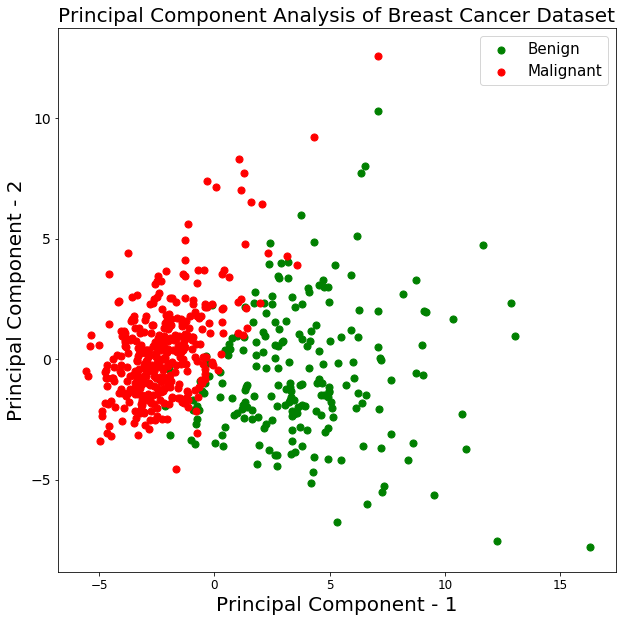

In [9]:
# Para ver gráficamente qué son, se pinta la muestra en funcion de las PC
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [10]:
# Ejemplo de PCA 2 (imagenes): dataset CIFAR - 10

In [11]:
# En keras los datasets vienen distribuidos por train y test, y se importan con el metodo load_data():
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Vemos el tamaño de los datasets importados:
print('Traning data shape:', x_train.shape)
print('Training target shape:', y_train.shape)
print('Testing data shape:', x_test.shape)
print('Testing target shape:', y_test.shape)

# En keras los datasets son distintos, así que para descubrir el número de outputs distintos tendremos que 
# ver el numero de valores únicos que hay en el dataset de entrenamiento:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# De la documentacion de Keras del dataset podemos ver a qué corresponde cada etiqueta:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Traning data shape: (50000, 32, 32, 3)
Training target shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing target shape: (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


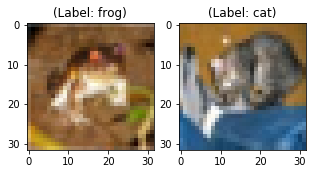

In [12]:
# Vamos a pintar alguna imagen del dataset para ver como son (la calidad es mierda porque son 32x32 pixeles):
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [13]:
# Igual que en el ejemplo anterior, hay que normalizar los datos:
print( "Minimo y maximo valor de cada pixel:")
print([np.min(x_train),np.max(x_train)])

# Son imagenes, asi que tendran 3 capas (rgb) con los pixeles entre 0 y 255:
x_train_2 = x_train/255.0

# Para manejar mas facil el dataset, y poder hacer el PCA, se juntan las 3 capas en una (reshape, flatten)
x_train_flat = x_train_2.reshape(-1,32*32*3)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train

# Comprobacion de que todo esta all right (...)
print('Size of the dataframe: {}'.format(df_cifar.shape))
df_cifar.head()

Minimo y maximo valor de cada pixel:
[0, 255]
Size of the dataframe: (50000, 3073)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [14]:
# Ya se puede hacer el PCA. Como antes, vamos a ponerlo en 2D para plottearlo:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

# Se pasa a dataframe
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

# Y vamos a ver cómo ha quedado y cuánto explica:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
principal_cifar_Df.head()

Explained variation per principal component: [0.2907663  0.11253144]


,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


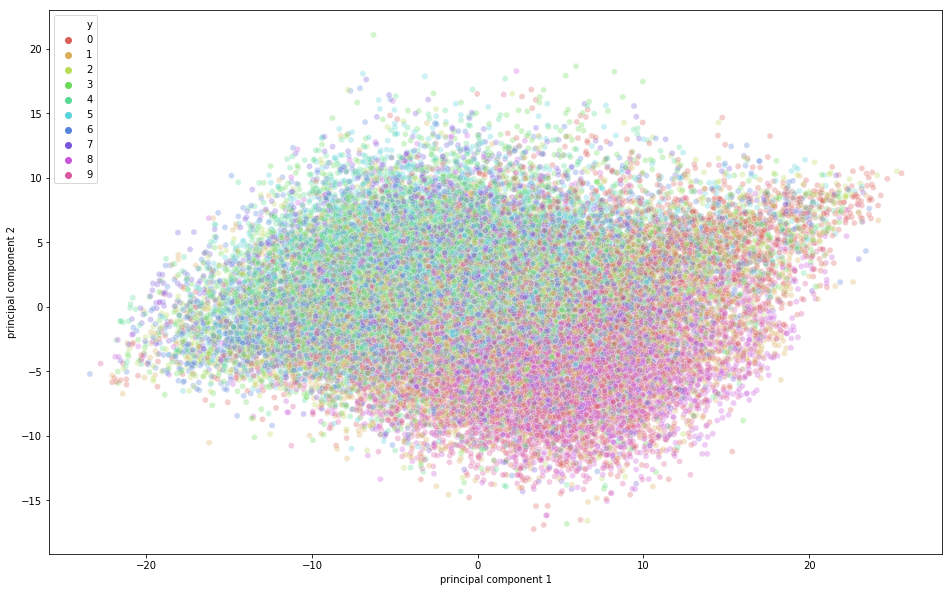

In [15]:
# Las componentes explican poco... Vamos a pintarlo (con seaborn, que queda mas guay):
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [16]:
# Por último, si se quiere elegir el número de componentes principales por varianza explicada, es tan simple 
# como pasarle a la funcion PCA el argumento de la varianza deseada:

pca = PCA(0.9)
pca.fit(x_train_flat)
print("El número de componentes que explican el 90% de la varianza es: " + str(pca.n_components_))

# Flatteamos el test:
x_test_flat = x_test.reshape(-1,3072)

# Y se utiliza el metodo transform para transformar los datasets de train y test:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)



El número de componentes que explican el 90% de la varianza es: 99
